In [1]:
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw, ImageChops, ImageFilter
import random
import numpy

In [2]:
# Definition of some constant
IMAGE_SIZE = (200, 200)
CHAR_USED = 1000
NUM_PER_CHAR = 5
FONT_SIZE = 200
FOREGROUND_COLOR = (0, 0, 0)
BACKGROUND_COLOR = (255, 255, 255)
FONT_NAME = "SimSun.ttf"

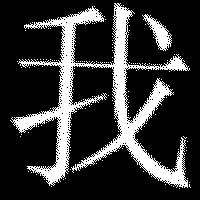

In [3]:
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = numpy.matrix(matrix, dtype=numpy.float)
    B = numpy.array(pb).reshape(8)

    res = numpy.dot(numpy.linalg.inv(A.T * A) * A.T, B)
    return numpy.array(res).reshape(8)

def generate_char(char, font_name):
    size = random.randint(20, 200)
    img=Image.new("RGB", (size, size), FOREGROUND_COLOR)
    font = ImageFont.truetype(font_name, size)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), char, BACKGROUND_COLOR,font=font)
    
    # Resize
    img = img.resize(IMAGE_SIZE)

    # 透视(平移、旋转、扭曲)
    dev = lambda: random.randint(-15, 15)
    old_points = [(0, 0), (IMAGE_SIZE[0], 0), (0, IMAGE_SIZE[1]), IMAGE_SIZE]
    new_points = [(0+dev(), 0+dev()), (IMAGE_SIZE[0]+dev(), 0+dev()), (0+dev(), IMAGE_SIZE[1]+dev()), (IMAGE_SIZE[0]+dev(), IMAGE_SIZE[1]+dev())]
    img = img.transform(IMAGE_SIZE, Image.PERSPECTIVE, find_coeffs(new_points, old_points), Image.BICUBIC)

    # 噪点
    rate = random.random() / 200
    for i in range(IMAGE_SIZE[0]):
        for j in range(IMAGE_SIZE[1]):
            if random.random() < rate:
                img.putpixel(xy=(i, j), value=FOREGROUND_COLOR)

    # 模糊
    img = img.filter(ImageFilter.GaussianBlur(radius=random.random()*2))

    return img.convert('1')
generate_char("我", "fonts/"+FONT_NAME)

In [27]:
normal_chars = open('data/frequent_chars.txt').read()

images = [[transform(generate_char(normal_chars[i], "fonts/{}".format(FONT_NAME))) for _ in range(NUM_PER_CHAR)] for i in range(CHAR_USED)]

In [28]:
for i in range(CHAR_USED):
    for j in range(NUM_PER_CHAR):
        images[i][j].save('data/{}/{}_{}.png'.format(FONT_NAME.split('.')[0], normal_chars[i], j))